In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.neural_network import MLPRegressor

In [2]:
df = pd.read_csv('./Dataset/train.csv', index_col='Id')
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Structure Investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
print('Shape of the train.csv file : ', df.shape)

Shape of the train.csv file :  (1460, 80)


In [5]:
print('Nuner of features : ', len(df.columns))
print(df.columns)

Nuner of features :  80
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',


In [10]:
df.dtypes

MSSubClass       int64  
MSZoning         object 
LotFrontage      float64
LotArea          int64  
Street           object 
Alley            object 
LotShape         object 
LandContour      object 
Utilities        object 
LotConfig        object 
LandSlope        object 
Neighborhood     object 
Condition1       object 
Condition2       object 
BldgType         object 
HouseStyle       object 
OverallQual      int64  
OverallCond      int64  
YearBuilt        int64  
YearRemodAdd     int64  
RoofStyle        object 
RoofMatl         object 
Exterior1st      object 
Exterior2nd      object 
MasVnrType       object 
MasVnrArea       float64
ExterQual        object 
ExterCond        object 
Foundation       object 
BsmtQual         object 
BsmtCond         object 
BsmtExposure     object 
BsmtFinType1     object 
BsmtFinSF1       int64  
BsmtFinType2     object 
BsmtFinSF2       int64  
BsmtUnfSF        int64  
TotalBsmtSF      int64  
Heating          object 
HeatingQC        object 


In [6]:
targets = df.SalePrice
df.drop(columns=['SalePrice'], axis = 1, inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
len(df.columns)

79

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/var/folders/nj/rlswb9ks3qzd3ch3nj0cg2qh0000gn/T/ipykernel_4147/3462665596.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Duplicates

In [9]:
df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


There are no duplicates in the dataset

## Numerical and Categorical  Columns

In [51]:
df_num = df.select_dtypes(exclude = 'object')
num_cols = df_num.columns
print('Number of numerical columns : ', len(df_num.columns))
df_num.head(5)

Number of numerical columns :  36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [52]:
df_cat = df.select_dtypes(include='object')
cat_cols = df_cat.columns
print('Number of numerical columns : ', len(df_cat.columns))
df_cat.head(5)

Number of numerical columns :  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Description

In [53]:
df_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [54]:
df_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## Null Values 

<AxesSubplot:>

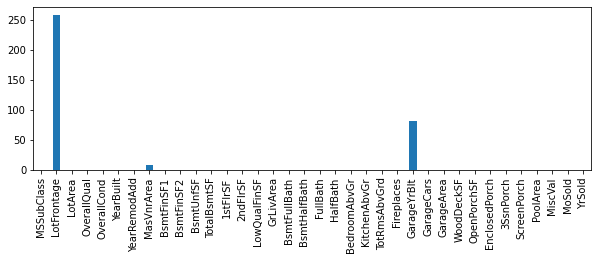

In [55]:
df_num.isnull().sum().plot(kind='bar', figsize=(10, 3))

<AxesSubplot:>

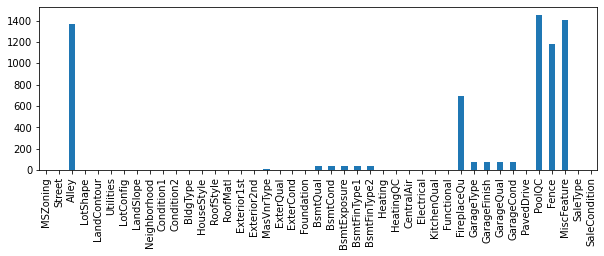

In [56]:
df_cat.isnull().sum().plot(kind='bar', figsize=(10, 3))

In [57]:
null_cat_70 = [
    col for col in df_cat.columns if df_cat[col].isnull().sum() > 0.7 * len(df)]
print('Categorical columns with more than 70% of the null values : ')
print(null_cat_70)

Categorical columns with more than 70% of the null values : 
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [58]:
df_cat.drop(columns=null_cat_70, axis=1, inplace=True)
print('Number of categorical columns after removing columns with more than 70% null values : ', len(df_cat.columns))
df_cat.head(5)

Number of categorical columns after removing columns with more than 70% null values :  39


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


**Values distributions**

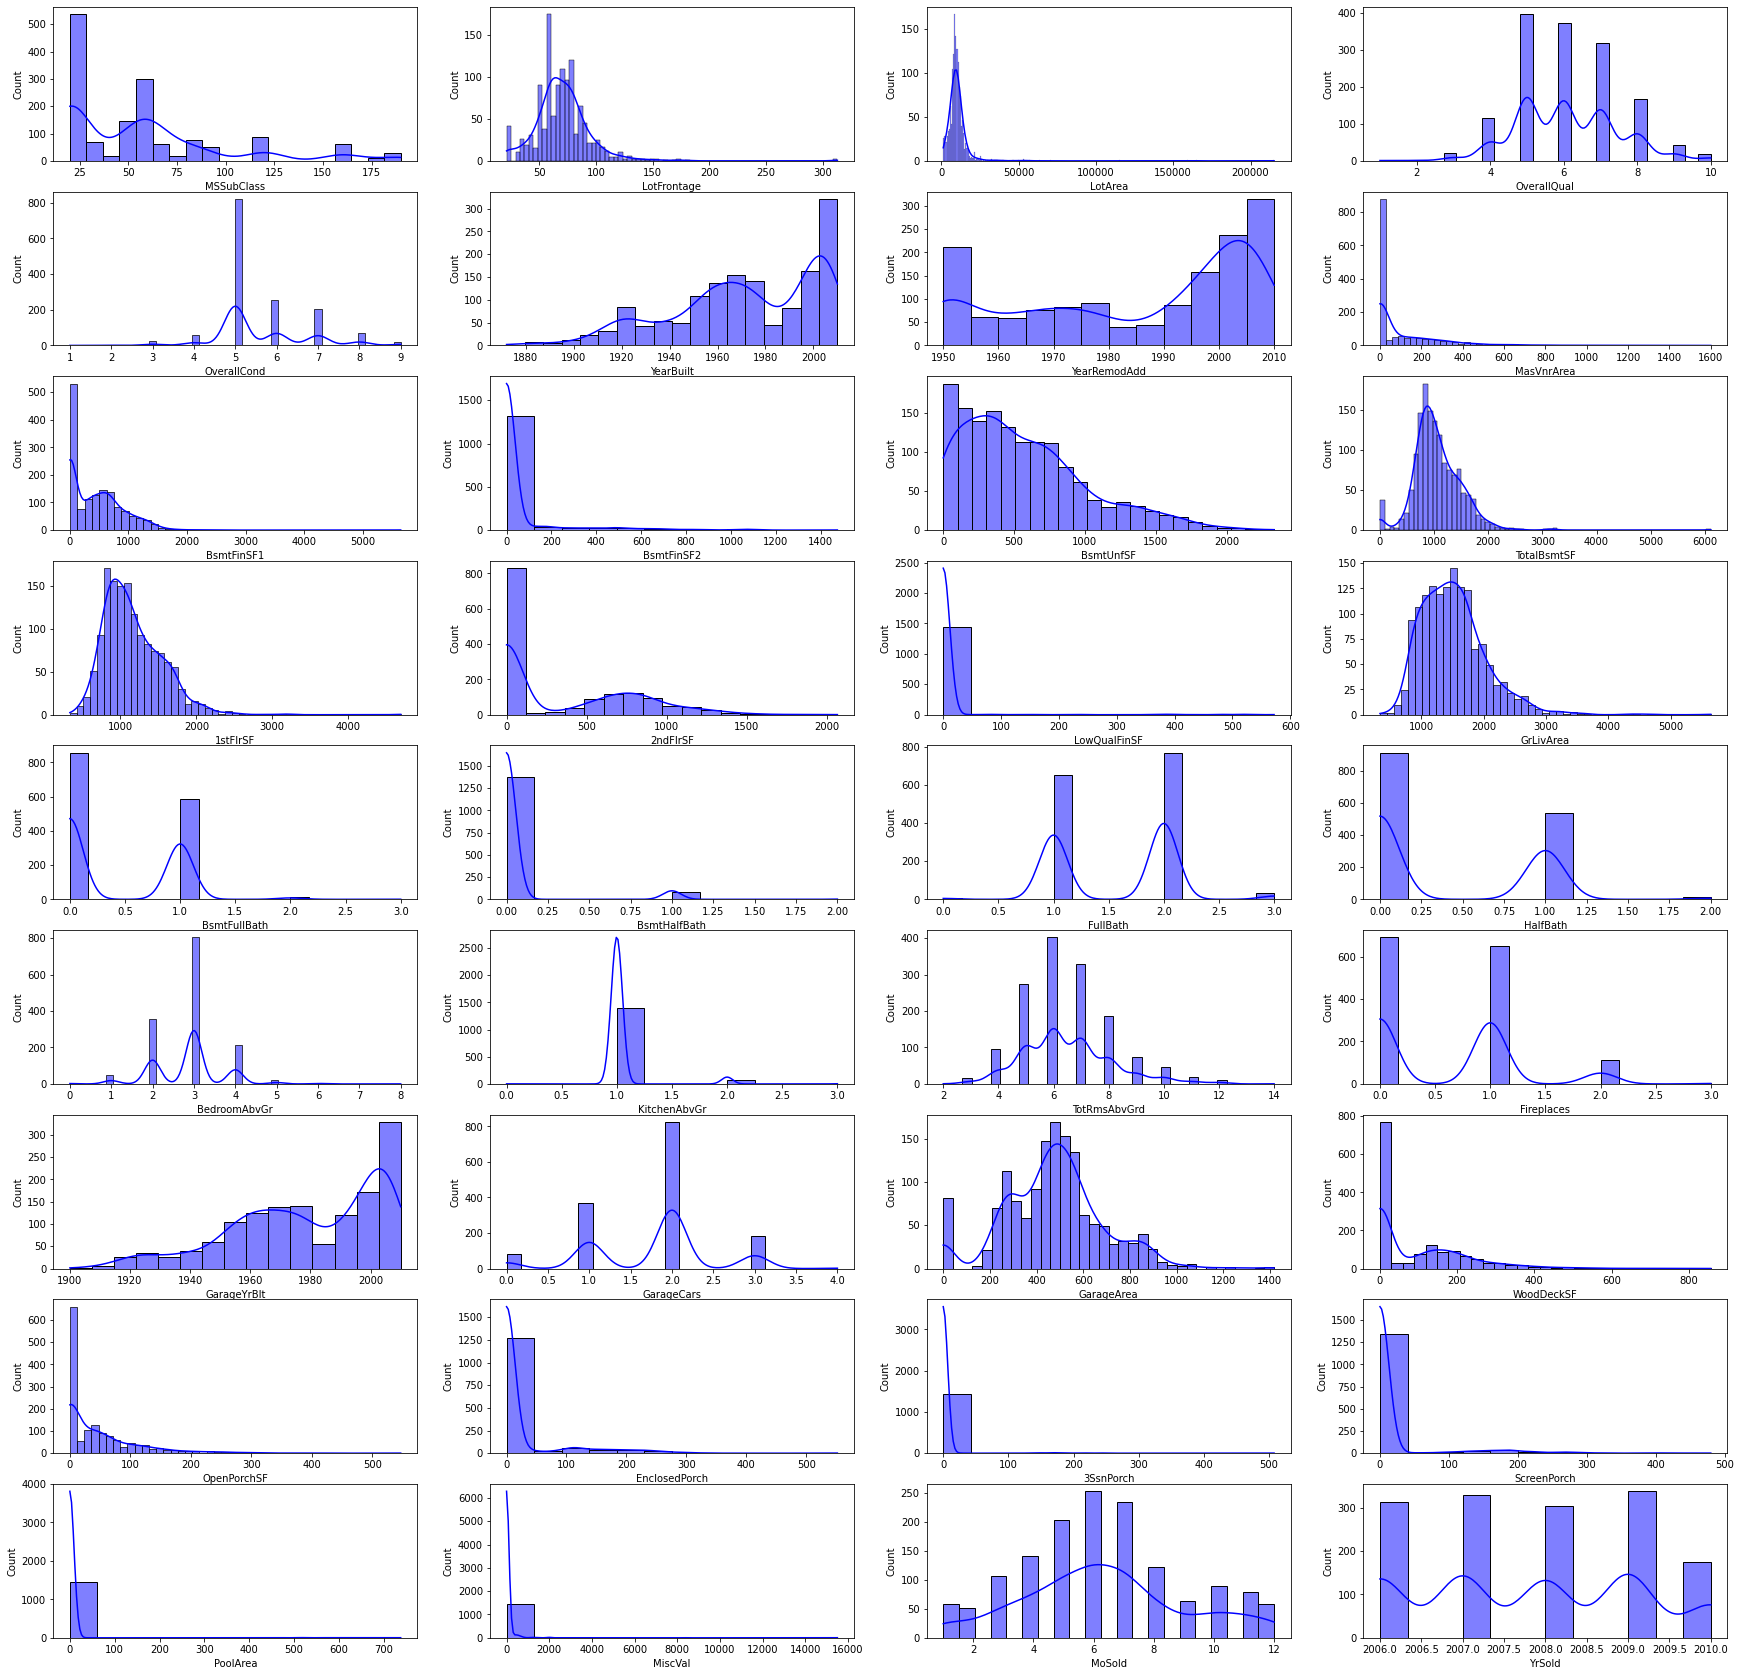

In [59]:
fig = plt.figure(figsize=(30, 30))
for index, col in enumerate(df_num.columns):
    plt.subplot(9,4, index+1)
    sns.histplot(x = col, data = df_num, kde = True, color = 'blue')
plt.show()

In [60]:
df_num_skew = df_num.skew()
df_num_skew[df_num_skew > 4].sort_values().index

Index(['BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'KitchenAbvGr',
       'LowQualFinSF', '3SsnPorch', 'LotArea', 'PoolArea', 'MiscVal'],
      dtype='object')

In [76]:
df_num['EnclosedPorch'].value_counts()

0      1252
112    15  
96     6   
192    5   
144    5   
120    5   
216    5   
156    4   
116    4   
252    4   
184    3   
126    3   
150    3   
164    3   
128    3   
102    3   
176    3   
228    3   
40     3   
80     2   
236    2   
34     2   
160    2   
32     2   
84     2   
115    2   
158    2   
137    2   
240    2   
100    2   
154    2   
185    2   
264    2   
190    2   
168    2   
108    2   
36     2   
202    2   
234    2   
77     2   
244    2   
180    2   
224    2   
205    2   
39     2   
114    2   
268    1   
19     1   
174    1   
226    1   
138    1   
94     1   
318    1   
48     1   
220    1   
194    1   
68     1   
254    1   
230    1   
275    1   
172    1   
170    1   
87     1   
214    1   
162    1   
50     1   
212    1   
221    1   
198    1   
301    1   
20     1   
286    1   
123    1   
280    1   
42     1   
81     1   
259    1   
145    1   
208    1   
330    1   
134    1   
196    1   
143    1   
37  

In [61]:
highly_skewed_discrete_cols = ['LowQualFinSF', 'PoolArea',
                        '3SsnPorch', 'ScreenPorch', 'MiscVal', 
                        'KitchenAbvGr', 'BsmtFinSF2', 'BsmtHalfBath']
df_num.drop(columns=highly_skewed_discrete_cols, axis='columns', inplace=True)
print('Number of columns left after removing skewed columns : ', len(df_num.columns))
df_num.head()

Number of columns left after removing skewed columns :  28


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,272,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,0,12,2008


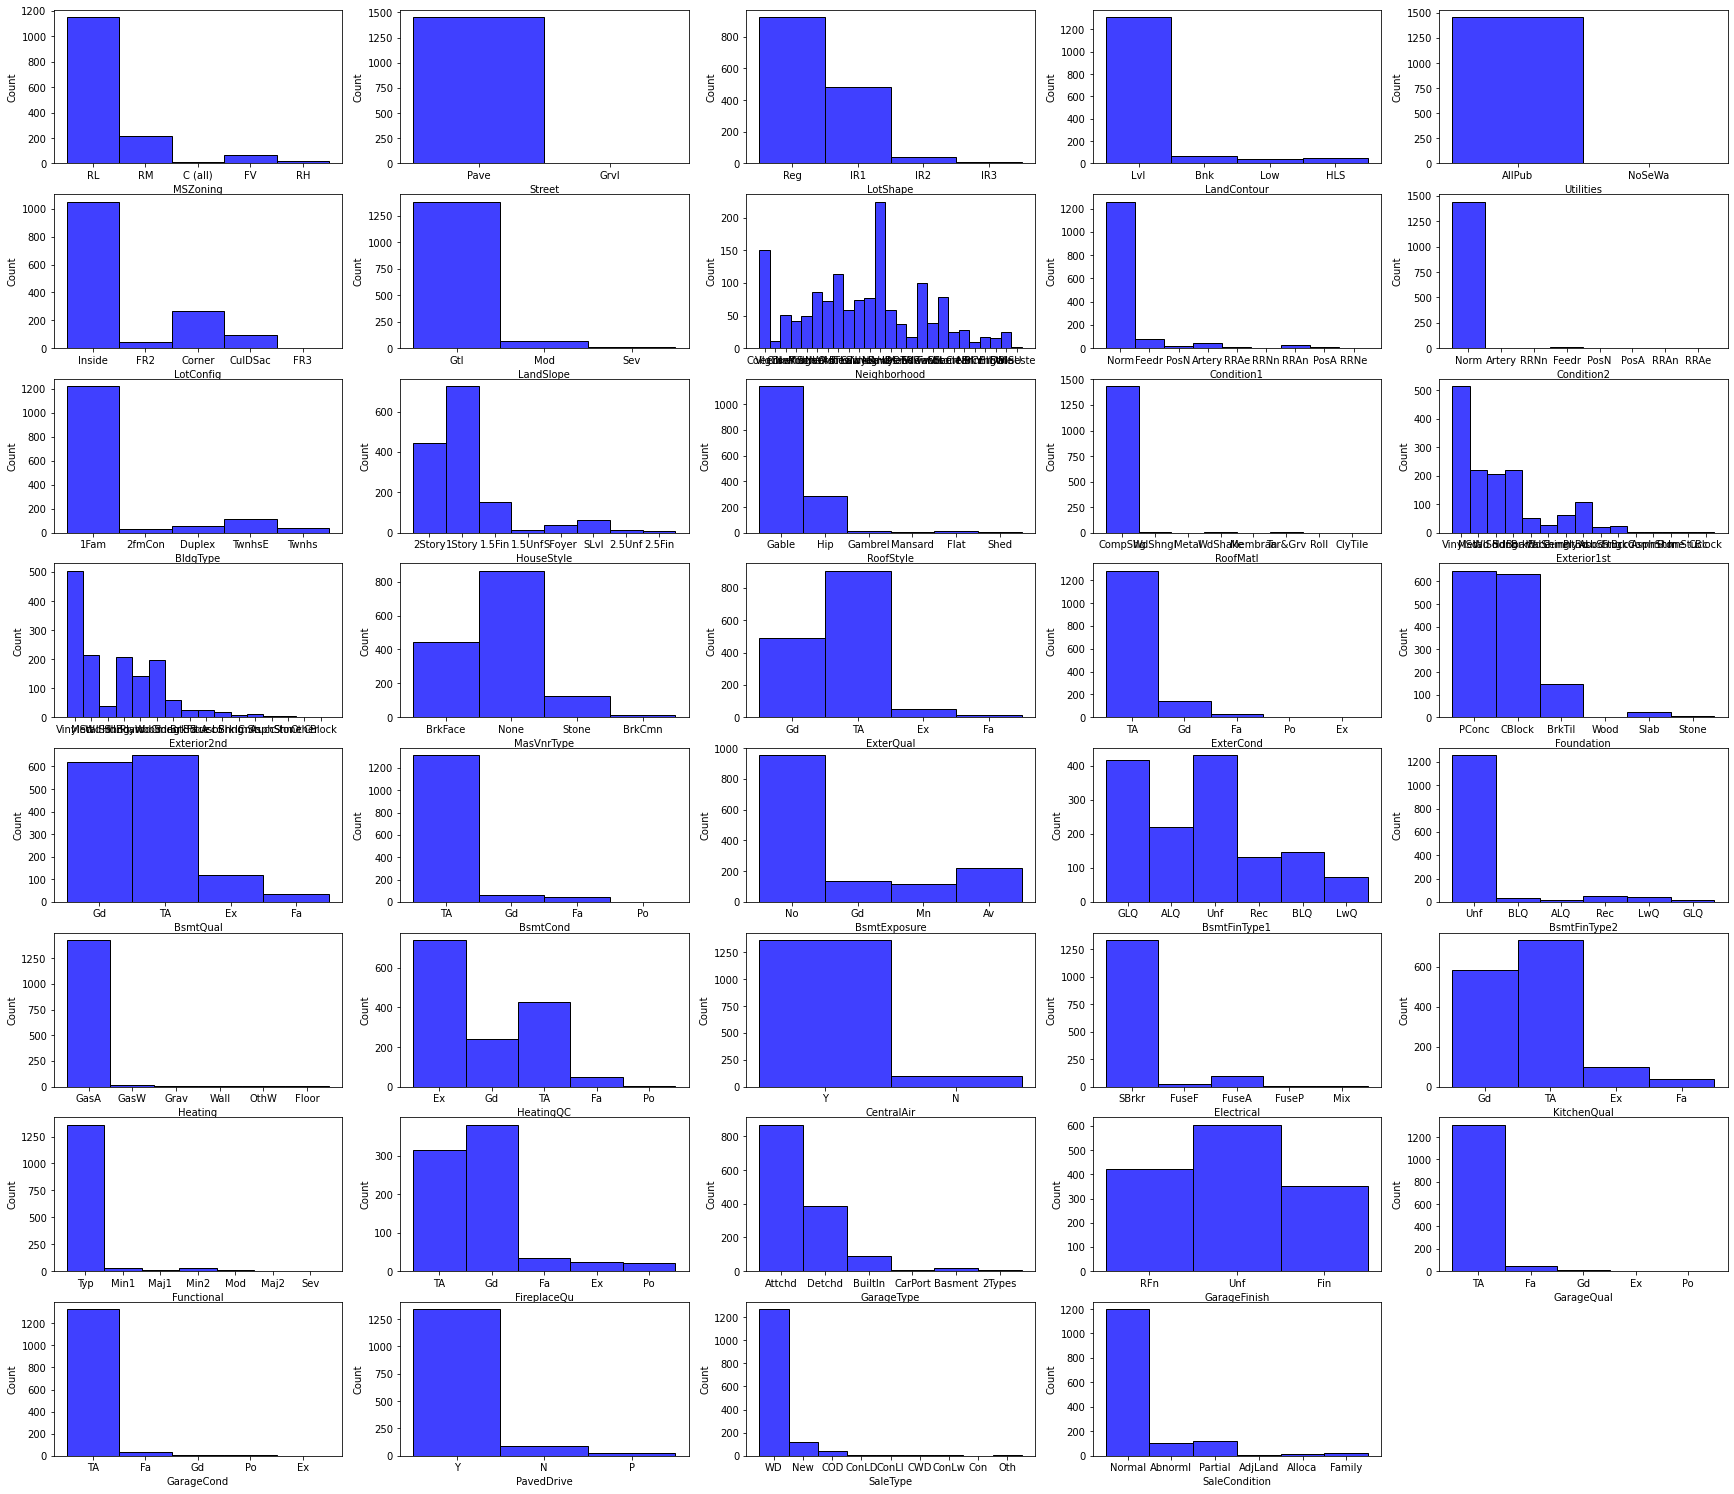

In [62]:
fig = plt.figure(figsize=(30, 30))
for index, col in enumerate(df_cat.columns):
    plt.subplot(9, 5, index+1)
    sns.histplot(x=col, data=df_cat, kde=False, color='blue')
plt.show()

In [63]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [71]:
df_cat['PavedDrive'].value_counts()


Y    1340
N    90  
P    30  
Name: PavedDrive, dtype: int64

In [70]:
df_cat['CentralAir'].value_counts()


Y    1365
N    95  
Name: CentralAir, dtype: int64

In [69]:
df_cat['BsmtFinType2'].value_counts()


Unf    1256
Rec    54  
LwQ    46  
BLQ    33  
ALQ    19  
GLQ    14  
Name: BsmtFinType2, dtype: int64

In [65]:
df_cat['LandContour'].value_counts()

Lvl    1311
Bnk    63  
HLS    50  
Low    36  
Name: LandContour, dtype: int64

In [64]:
df_cat['LandSlope'].value_counts()

Gtl    1382
Mod    65  
Sev    13  
Name: LandSlope, dtype: int64

In [17]:
df_cat['Electrical'].value_counts()

SBrkr    1334
FuseA    94  
FuseF    27  
FuseP    3   
Mix      1   
Name: Electrical, dtype: int64

In [18]:
df_cat['Functional'].value_counts()

Typ     1360
Min2    34  
Min1    31  
Mod     15  
Maj1    14  
Maj2    5   
Sev     1   
Name: Functional, dtype: int64

In [87]:
df_cat['GarageQual'].value_counts()

TA    1311
Fa    48  
Gd    14  
Ex    3   
Po    3   
Name: GarageQual, dtype: int64

In [88]:
df_cat['GarageCond'].value_counts()

TA    1326
Fa    35  
Gd    9   
Po    7   
Ex    2   
Name: GarageCond, dtype: int64

In [91]:
df_cat['MiscFeature'].value_counts()

Shed    49
Gar2    2 
Othr    2 
TenC    1 
Name: MiscFeature, dtype: int64

In [72]:
skewed_cat_cols = ['Street', 'Utilities', 'RoofMatl', 'Condition2', 'LandSlope', 'Electrical',
                   'BsmtCond', 'Heating', 'Functional', 'GarageQual', 'GarageCond', 'CentralAir', 'PavedDrive']
df_cat.drop(columns= skewed_cat_cols, axis = 1, inplace = True)
print('Number of columns after removing skewed columns : ', len(df_cat.columns))
df_cat.head(5)

Number of columns after removing skewed columns :  26


,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,Ex,Gd,NaN,Attchd,RFn,WD,Normal
2,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,Ex,TA,TA,Attchd,RFn,WD,Normal
3,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,WD,Normal
4,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,Gd,Gd,Gd,Detchd,Unf,WD,Abnorml
5,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,WD,Normal


**Outliers**

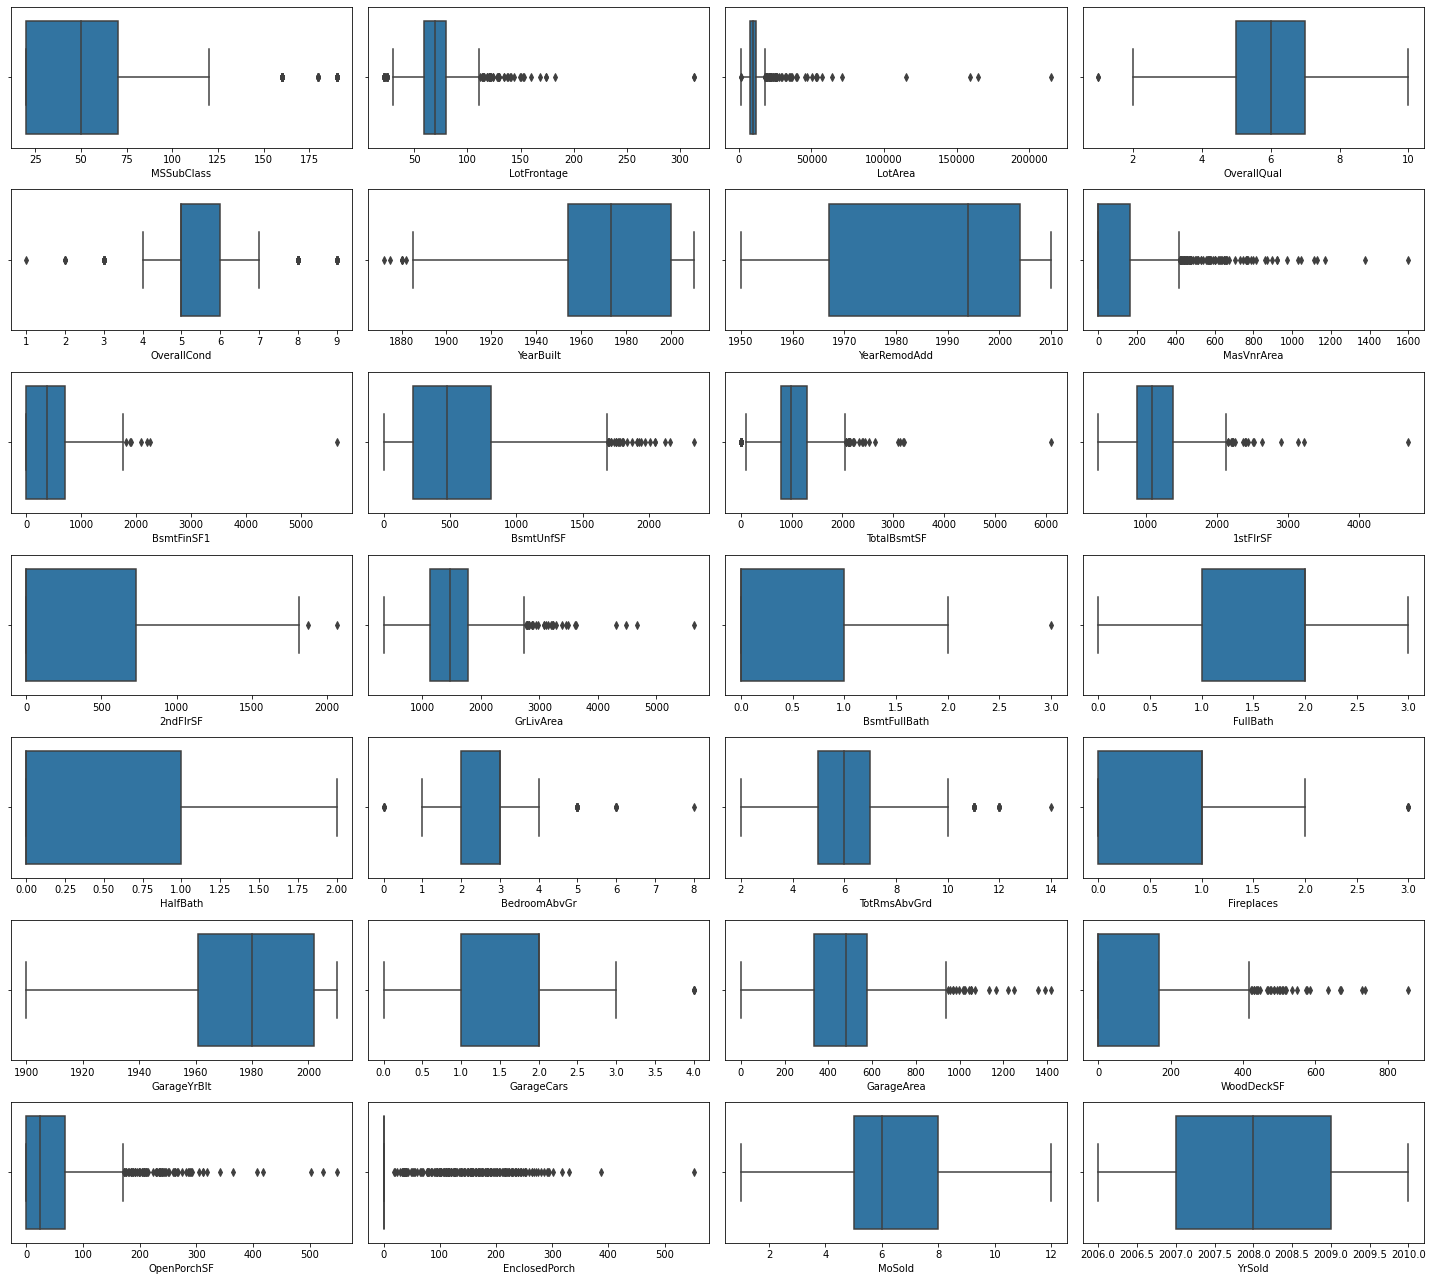

In [73]:
num_cols = df_num.columns
plt.figure(figsize = (20,20))
for index, col in enumerate(num_cols):
    plt.subplot(8,4,index + 1)
    sns.boxplot(x = col, data = df_num)
plt.tight_layout()

In [77]:
# df_out = df_num.copy()
num_cols = df_num.columns
outlier_indices = {}
n_outliers = []
for col in num_cols:
    q1 = np.quantile(df_num[col], 0.25)
    q3 = np.quantile(df_num[col], 0.75)
    iqr = q3 - q1
    min_range = q1 - 3 * iqr
    max_range = q3 + 3 * iqr
    inds = df_num[(df_num[col] > max_range) | (df_num[col] < min_range)].index
    outlier_indices[col] = inds
    n_outliers.append(len(inds))
    print(f'Number of outliers exist in column {col} = {len(inds)}')


Number of outliers exist in column MSSubClass = 0
Number of outliers exist in column LotFrontage = 0
Number of outliers exist in column LotArea = 34
Number of outliers exist in column OverallQual = 0
Number of outliers exist in column OverallCond = 1
Number of outliers exist in column YearBuilt = 0
Number of outliers exist in column YearRemodAdd = 0
Number of outliers exist in column MasVnrArea = 0
Number of outliers exist in column BsmtFinSF1 = 1
Number of outliers exist in column BsmtUnfSF = 0
Number of outliers exist in column TotalBsmtSF = 5
Number of outliers exist in column 1stFlrSF = 3
Number of outliers exist in column 2ndFlrSF = 0
Number of outliers exist in column GrLivArea = 4
Number of outliers exist in column BsmtFullBath = 0
Number of outliers exist in column FullBath = 0
Number of outliers exist in column HalfBath = 0
Number of outliers exist in column BedroomAbvGr = 1
Number of outliers exist in column TotRmsAbvGrd = 1
Number of outliers exist in column Fireplaces = 0
N

/Users/pindikrishna/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

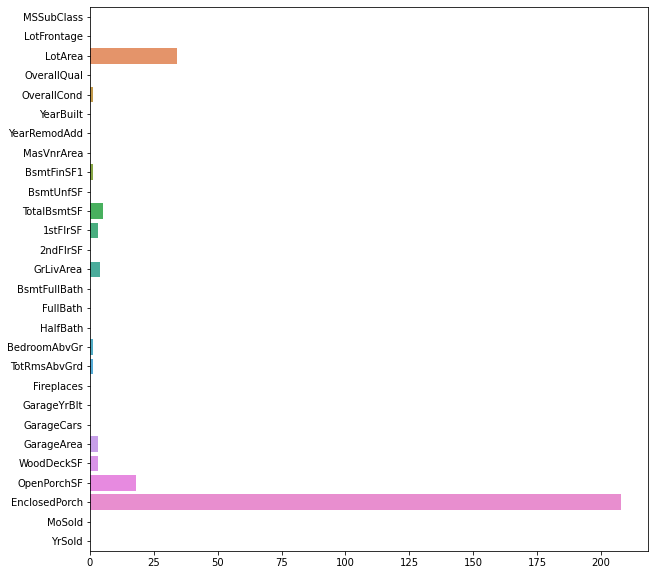

In [78]:
plt.figure(figsize = (10,10))
sns.barplot(np.array(n_outliers), num_cols.values, orient='h')

In [80]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [87]:
df_num['OverallCond'].value_counts()


5    821
6    252
7    205
8    72 
4    57 
3    25 
9    22 
2    5  
1    1  
Name: OverallCond, dtype: int64

In [89]:
df_num['BedroomAbvGr'].value_counts()


3    804
2    358
4    213
1    50 
5    21 
6    7  
0    6  
8    1  
Name: BedroomAbvGr, dtype: int64

In [88]:
df_num['TotRmsAbvGrd'].value_counts()


6     402
7     329
5     275
8     187
4     97 
9     75 
10    47 
11    18 
3     17 
12    11 
2     1  
14    1  
Name: TotRmsAbvGrd, dtype: int64

**Observations**
1. These three columns ['OverallCond', 'BedroomAbvGr', 'TotRmsAbvGrd'] represents the overall condition, number of bedrooms above grade and total number of rooms above grade. The number of outliers are very less. Therefore, these entries can be removed. 

2. Other columns with outliers represents represents area in square ft. We can remove skewness by applying log transformation instead of removing those entries. 

In [90]:
num_cols = df_num.columns
outlier_cols = ['OverallCond', 'BedroomAbvGr', 'TotRmsAbvGrd']
for col in outlier_cols:
    q1 = np.quantile(df_num[col], 0.25)
    q3 = np.quantile(df_num[col], 0.75)
    iqr = q3 - q1
    min_range = q1 - 3 * iqr
    max_range = q3 + 3 * iqr
    inds = df_num[(df_num[col] > max_range) | (df_num[col] < min_range)].index
#     print(f'Number of outliers exist in column {col} = {len(inds)}')
    df_num.drop(inds, axis=0, inplace=True)
print('Number of entries after removing the outliers : ', len(df_num))
print('Number of columns after dropping the columns with  more outliers : ',
      len(df_num.columns))

Number of entries after removing the outliers :  1458
Number of columns after dropping the columns with  more outliers :  28


In [91]:
df_cat = df_cat.loc[df_num.index]     # outliers indices should be removed in df_cat also.
len(df_cat) 

1458

**Numer of uniques values distribution**

<AxesSubplot:>

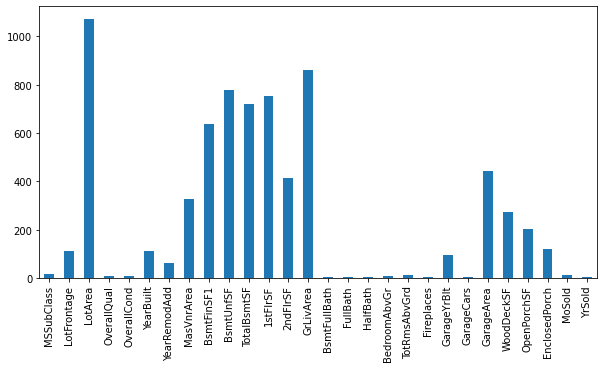

In [92]:
df_num.nunique().plot(kind = 'bar', figsize = (10,5))

<AxesSubplot:>

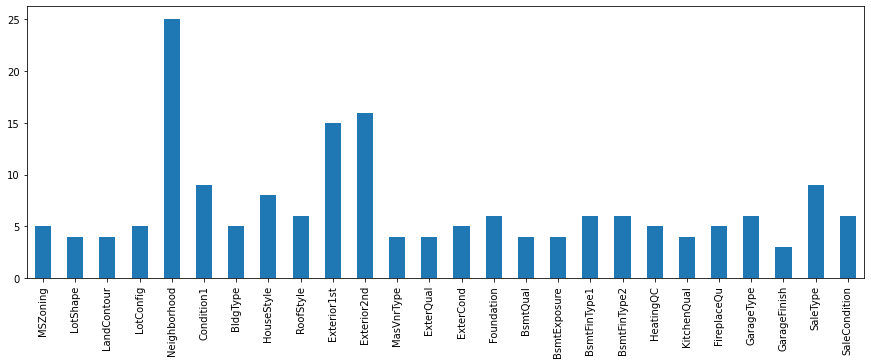

In [93]:
df_cat.nunique().plot(kind = 'bar', figsize = (15,5))

In [94]:
cat_cols = df_cat.columns
num_cols = df_num.columns
print('Number of Categorical Cols : ', len(cat_cols))
print('Categorical : ', cat_cols)
print('-------------------------------------------')
print('Number of numerical Cols : ', len(num_cols))
print('Numerical cols : ', num_cols)

Number of Categorical Cols :  26
Categorical :  Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')
-------------------------------------------
Number of numerical Cols :  28
Numerical cols :  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold'

In [95]:
df_final = pd.merge(df_num, df_cat, on='Id', how='left')
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,0,2,2008,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,Ex,Gd,NaN,Attchd,RFn,WD,Normal
2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,0,5,2007,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,Ex,TA,TA,Attchd,RFn,WD,Normal
3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,0,9,2008,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,WD,Normal
4,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,272,2,2006,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,Gd,Gd,Gd,Detchd,Unf,WD,Abnorml
5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,0,12,2008,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,WD,Normal


In [96]:
df_final.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [97]:
df_final.to_csv('./data/Train_Final.csv')